In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm

In [ ]:
# Nasa data
Truths = np.array([
    [-12.2535, -1.25912],
    [-11.2222, -1.18135],
    [-10.1947, -1.06927],
    [-8.14138, -0.827958],
    [-6.25579, -0.638207],
    [-5.22822, -0.526128],
    [-4.19972, -0.422627],
    [-1.96944, -0.215533],
    [0., 0.],
    [0.940006, 0.120611],
    [1.96944, 0.215533],
    [2.99515, 0.34477],
    [3.85131, 0.439599],
    [4.87888, 0.551678],
    [5.90831, 0.6466],
    [7.96346, 0.870758],
    [10.1891, 1.12074],
    [11.0471, 1.19842]
])

In [ ]:
index = 1 # 17, 10, 5
# Importing result to know the shape of other results
dummy_result = np.loadtxt(f"./data/L_Coeffs_errors_circle_P:1_AOA:{Truths[index,0]}.txt")

# AOA = 

In [113]:
Truths[index,0]

np.float64(-11.2222)

## Gathering data

In [114]:
n_airfoil = np.loadtxt(f"./data/n_airfoil.txt")
n_airfoil = list(map(int, n_airfoil))
ps = np.loadtxt(f"./data/ps.txt")
ps = list(map(int, ps))
results_ellipse = np.empty((len(ps),dummy_result.shape[0],dummy_result.shape[1]))
results_circle = np.empty((len(ps),dummy_result.shape[0],dummy_result.shape[1]))
for i in ps:
    results_circle[i-1] = np.loadtxt(f"./data/L_Coeffs_errors_circle_P:{i}_AOA:{Truths[index,0]}.txt")
    results_ellipse[i-1] = np.loadtxt(f"./data/L_Coeffs_errors_ellipse_P:{i}_AOA:{Truths[index,0]}.txt")

## Circular

In [ ]:
error = abs(results_circle[:,0,:])
times = results_circle[:,1,:]


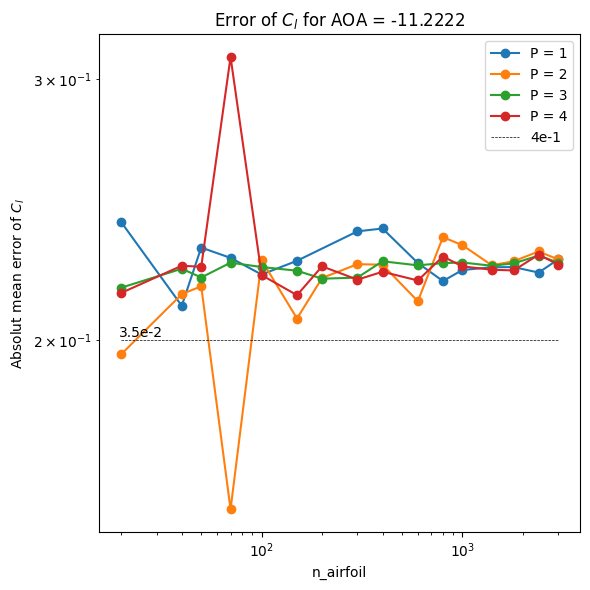

In [ ]:
fig,ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(len(ps)):
    e = error[i]
    emask = [np.isnan(e) == False][0]
    e = e[emask]
    x = np.array(n_airfoil)[emask]
    ax.loglog(x, e, label=f'P = {ps[i]}', marker='o')

ax.plot(n_airfoil, np.ones_like(n_airfoil)*e-1, 'k--', label='4e-1', linewidth=0.5)
# ax.text(2.5e1, 2e-1, '3.5e-2', fontsize=10, color='k', ha='center', va='bottom')
ax.set_xlabel('n_airfoil')
ax.set_ylabel('Absolut mean error of $C_l$')
ax.set_title(f'Error of $C_l$ for AOA = {Truths[index,0]}')
ax.legend()
plt.tight_layout()
plt.show()


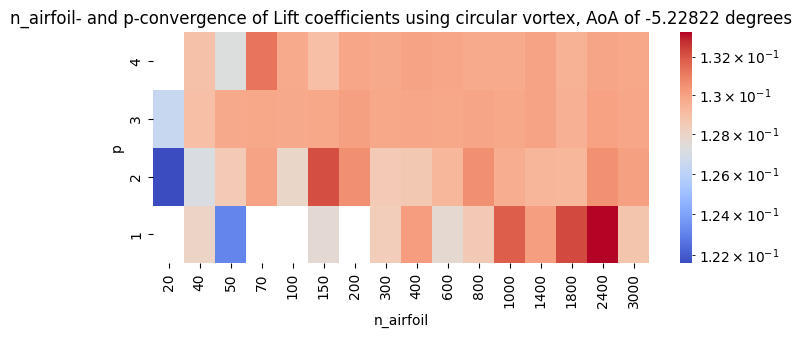

In [107]:
data = pd.DataFrame(error[::-1,:], index=ps[::-1],
                         columns=n_airfoil)

# Lav heatmap
fig, ax = plt.subplots(figsize=(8,3))
sns.heatmap(data, cmap='coolwarm', fmt=".2f", norm=LogNorm(vmin=data.min().min(), vmax=data.max().max()), ax=ax)

plt.title(f'n_airfoil- and p-convergence of Lift coefficients using circular vortex, AoA of {Truths[index,0]} degrees')
plt.xlabel('n_airfoil')
plt.ylabel('p')
plt.show()

# Ellipse

In [108]:
error = results_ellipse[:,0,:]
error = np.abs(error)
times = results_ellipse[:,1,:]
nan = error[0][6]
np.isnan(error[0])

array([ True, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False])

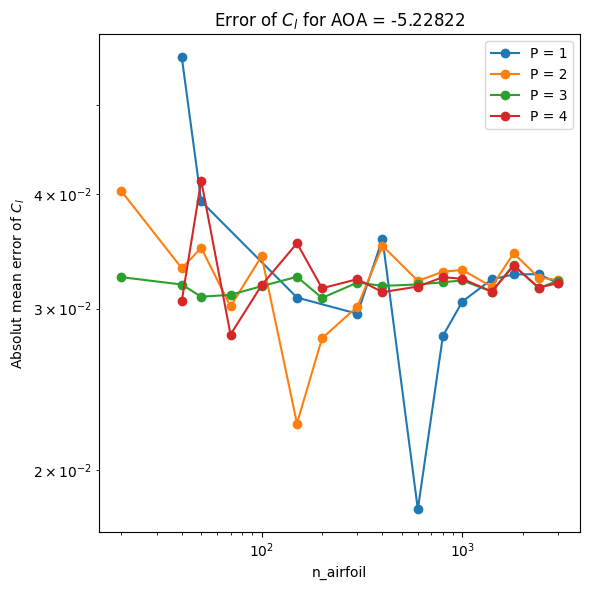

In [110]:
fig,ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(len(ps)):
    e = error[i]
    emask = [np.isnan(e) == False][0]
    e = e[emask]
    x = np.array(n_airfoil)[emask]
    ax.loglog(x, e, label=f'P = {ps[i]}', marker='o')

ax.set_xlabel('n_airfoil')
ax.set_ylabel('Absolut mean error of $C_l$')
ax.set_title(f'Error of $C_l$ for AOA = {Truths[index,0]}')
ax.legend()
plt.tight_layout()
plt.show()

0.018142317236752303
0.05635173020530426


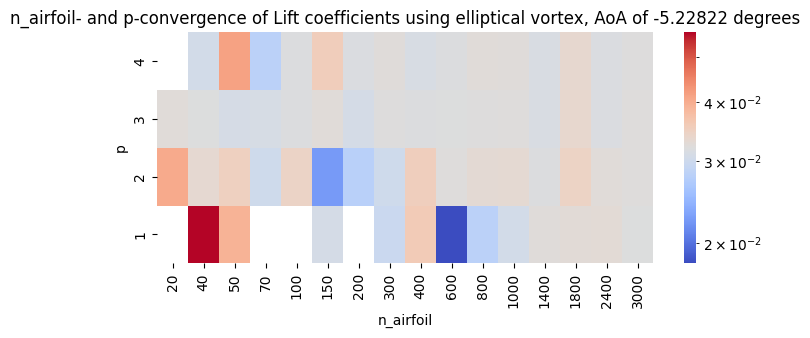

In [111]:
data = pd.DataFrame(error[::-1,:], index=ps[::-1],
                         columns=n_airfoil)

# Lav heatmap
fig, ax = plt.subplots(figsize=(8,3))
print(data.min().min())
print(data.max().max())
sns.heatmap(data, cmap='coolwarm', fmt=".2f", norm=LogNorm(vmin=data.min().min(), vmax=data.max().max()), ax=ax)

plt.title(f'n_airfoil- and p-convergence of Lift coefficients using elliptical vortex, AoA of {Truths[index,0]} degrees')
plt.xlabel('n_airfoil')
plt.ylabel('p')
plt.show()